In [41]:
#SIR
import numpy as np

beta=3
gamma=1

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_S[0]=0.99
v_I[0]=0.01

# SIR
for t in range(nsteps):
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]-gamma*v_I[t]*dt
    v_R[t+1]=v_R[t]+gamma*v_I[t]*dt

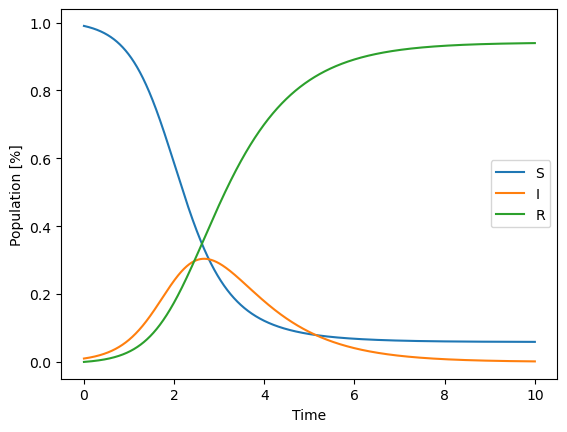

In [42]:
#SIR diagram
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()

plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR.png', bbox_inches='tight') #Ábra mentése

In [43]:
#SIR modellből kinyert adatok generálása
#halottak száma (v_R)
deaths = 0.00
for i in v_R:
    deaths += i

print(sum(v_R))
    
print('Total number of deaths: ', deaths)

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt

#infected += deaths
print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
beteg = 0.00
for i in v_I:
    if(i > beteg):
        beteg = i

print('Maximum amount of infected people at the same time: ', beteg)

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
t = 0.05
greater = 0.000
for i in v_I:
    if(i > t):
        greater += dt
        
print('Length of time when v_I(t)>t: ', greater)

6348.585143311749
Total number of deaths:  6348.585143311749
Total number of infections:  0.9393846432467118
Maximum amount of infected people at the same time:  0.3039299066025501
Length of time when v_I(t)>t:  4.885999999999966


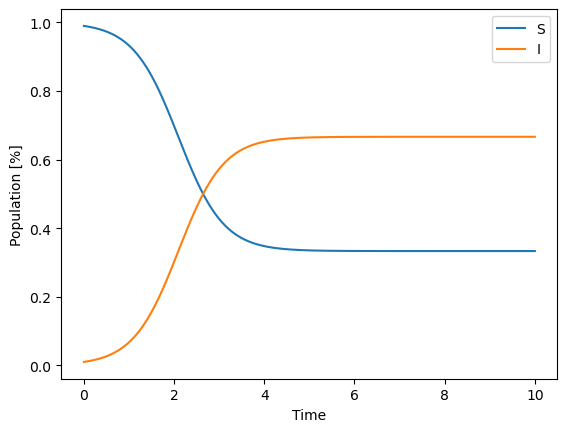

In [44]:
#SIS diagram and modell
beta=3
gamma=1

# SIS
for t in range(nsteps):
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]+gamma*v_I[t]*dt
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]-gamma*v_I[t]*dt

plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIS_3_1.png', bbox_inches='tight') #Ábra mentése

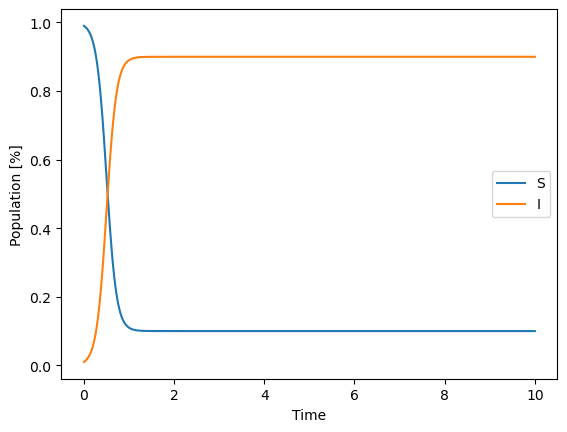

In [45]:
#SIS diagram and model
beta=10
gamma=1

# SIS
for t in range(nsteps):
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]+gamma*v_I[t]*dt
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]-gamma*v_I[t]*dt

plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIS_10_1.png', bbox_inches='tight') #Ábra mentése

In [46]:
# SIR communities
L=3
w=[0.5,0.3,0.2]
A=[[6,2,1],
   [2,3,1],
   [1,1,0.5]]

# time and steps
T=10
dt=0.001
nsteps=round(T/dt)
v_S=[[0,0,0] for t in range(nsteps+1)]
v_I=[[0,0,0] for t in range(nsteps+1)]
v_R=[[0,0,0] for t in range(nsteps+1)]

# initial condition
v_S[0]=[0.95,1,1]   #Egymás alatti értékeknek 1-et kell adni
v_I[0]=[0.05,0,0]

# model parameters
beta=1.5
gamma=1

# SIR for communities
for t in range(nsteps):
    for l in  range(L): 
         v_S[t+1][l]=v_S[t][l]-dt*beta*v_S[t][l]*sum(A[k][l]*w[k]*v_I[t][k] for k in range(L))
         v_I[t+1][l]=v_I[t][l]+dt*beta*v_S[t][l]*sum(A[k][l]*w[k]*v_I[t][k] for k in range(L))-gamma*v_I[t][l]*dt
         v_R[t+1][l]=v_R[t][l]+gamma*v_I[t][l]*dt

In [47]:
A
v_S[1]

[0.9497862499999999, 0.999925, 0.9999625]

In [48]:
v_Sa=[v_S[t][0] for t in range(nsteps+1)]
#v_Sa
v_Ia=[v_I[t][0] for t in range(nsteps+1)]
#v_Ia
v_Ra=[v_R[t][0] for t in range(nsteps+1)]
#v_Ra

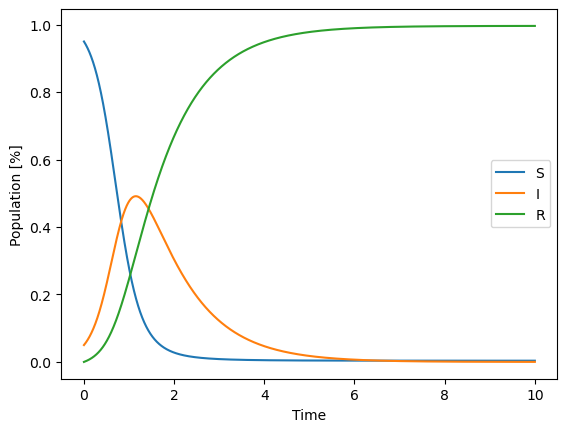

In [49]:
#SIR communities diagram
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_Sa,label='S')
plt.plot(trange,v_Ia,label='I')
plt.plot(trange,v_Ra,label='R')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_communities_1.5_1_a.png', bbox_inches='tight') #Ábra mentése

In [50]:
v_Sb=[v_S[t][2] for t in range(nsteps+1)]
v_Ib=[v_I[t][2] for t in range(nsteps+1)]
v_Rb=[v_R[t][2] for t in range(nsteps+1)]


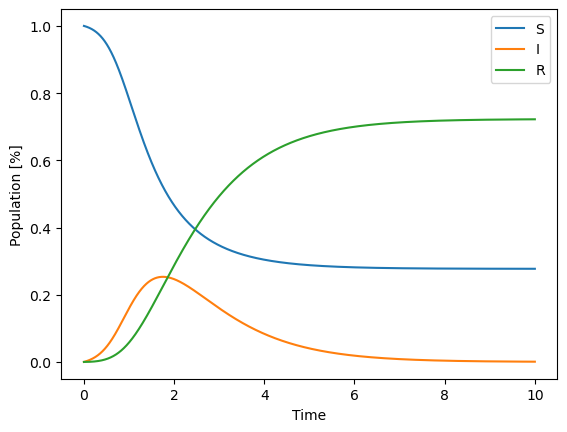

In [51]:
#SIR communities diagram
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_Sb,label='S')
plt.plot(trange,v_Ib,label='I')
plt.plot(trange,v_Rb,label='R')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_communities_1.5_1_b.png', bbox_inches='tight') #Ábra mentése

In [52]:
#SIR-ből SIR-D
beta=10
gamma=1
mu=0.01

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I[0]=0.05

for t in range(nsteps):
    mu = 0.01+v_I[t]/10
    v_S[t+1]=v_S[t]-dt*beta*v_S[t]*v_I[t]
    v_I[t+1]=v_I[t]+dt*beta*v_S[t]*v_I[t]-gamma*v_I[t]*dt
    v_R[t+1]=v_R[t]+(1-mu)*gamma*v_I[t]*dt
    v_D[t+1]=v_D[t]+mu*gamma*v_I[t]*dt
#for i in v_I:
#    print(i/10)

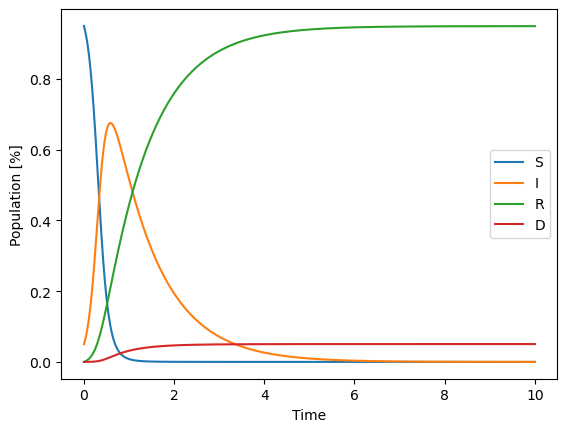

In [53]:
#SIRD diagram
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I,label='I')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_10_1_0.01.png', bbox_inches='tight') #Ábra mentése

In [54]:
#SIRD modellből kinyert adatok generálása
#halottak száma (v_R)

print('Total number of deaths: ', v_D[nsteps])

#Összes fertőzőttek száma (v_I)
infected = sum(v_I)*dt
print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', max(v_I))

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I(t)>t: ', overloadedtime)

Total number of deaths:  0.05051960999413467
Total number of infections:  0.9998927804733715
Maximum amount of infected people at the same time:  0.6754455121398604
Length of time when v_I(t)>t:  3.3539999999997416


In [55]:
#communities (SIRD)
L=3
w=[0.5,0.3,0.2]
A=[[6,2,1],
   [2,3,1],
   [1,1,0.5]]

# time and steps
T=10
dt=0.001
nsteps=round(T/dt)
v_S=[[0,0,0] for t in range(nsteps+1)]
v_I=[[0,0,0] for t in range(nsteps+1)]
v_R=[[0,0,0] for t in range(nsteps+1)]
v_D=[[0,0,0] for t in range(nsteps+1)]

# initial condition
v_S[0]=[0.95,1,1]   #Egymás alatti értékeknek 1-et kell adni
v_I[0]=[0.05,0,0]

# model parameters
beta = 1.2
gamma = 1
mu = 0.001

# SIRD for communities
for t in range(nsteps):
    for l in  range(L): 
         mu = 0.01+v_I[t][l]/10
         v_S[t+1][l]=v_S[t][l]-dt*beta*v_S[t][l]*sum(A[k][l]*w[k]*v_I[t][k] for k in range(L))
         v_I[t+1][l]=v_I[t][l]+dt*beta*v_S[t][l]*sum(A[k][l]*w[k]*v_I[t][k] for k in range(L))-gamma*v_I[t][l]*dt
         v_R[t+1][l]=v_R[t][l]+(1-mu)*gamma*v_I[t][l]*dt
         v_D[t+1][l]=v_D[t][l]+mu*v_I[t][l]*dt

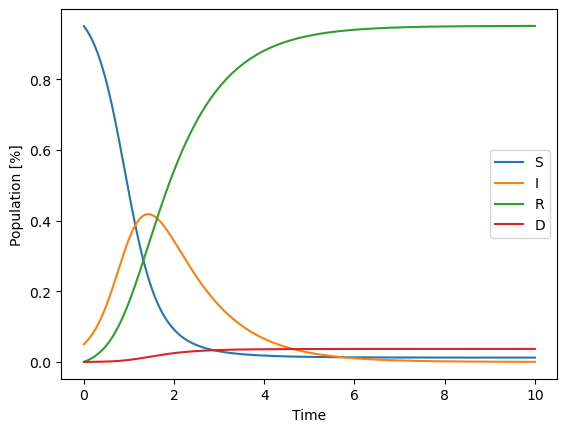

In [56]:
#Diagrams for communities with D
v_Sa=[v_S[t][0] for t in range(nsteps+1)]
#v_Sa
v_Ia=[v_I[t][0] for t in range(nsteps+1)]
#v_Ia
v_Ra=[v_R[t][0] for t in range(nsteps+1)]
#v_Ra
v_Da=[v_D[t][0] for t in range(nsteps+1)]
v_S_data = [0, 0, 0]
v_I_data = [0, 0, 0]
v_R_data = [0, 0, 0]
v_D_data = [0, 0, 0]

for i in range(L):
    v_S_data[i] = [v_S[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_I_data[i] = [v_I[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_R_data[i] = [v_R[t][i] for t in range(nsteps+1)]

for i in range(L):
    v_D_data[i] = [v_D[t][i] for t in range(nsteps+1)]


trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_data[0],label='S')
plt.plot(trange,v_I_data[0],label='I')
plt.plot(trange,v_R_data[0],label='R')
plt.plot(trange,v_D_data[0],label='D')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_communities_1.2_1_0.001_a.png', bbox_inches='tight') #Ábra mentése

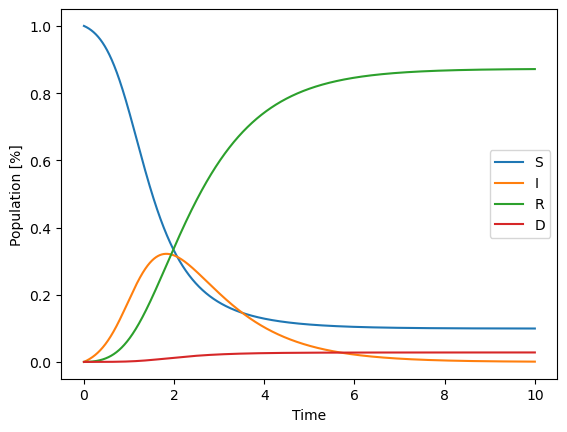

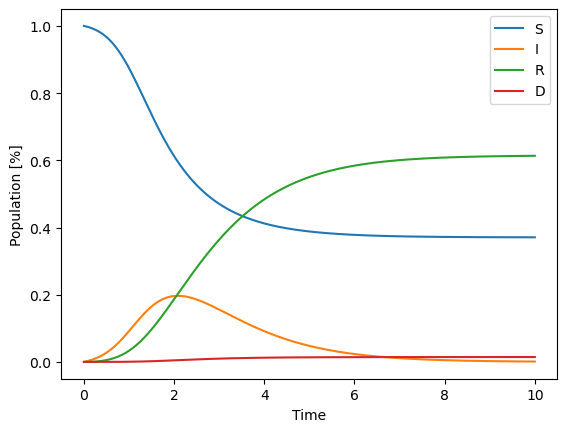

In [57]:
#SIR_D comm diagram b
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_data[1],label='S')
plt.plot(trange,v_I_data[1],label='I')
plt.plot(trange,v_R_data[1],label='R')
plt.plot(trange,v_D_data[1],label='D')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_communities_1.2_1_0.001_b.png', bbox_inches='tight') #Ábra mentése

#SIR_D comm diagram c
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S_data[2],label='S')
plt.plot(trange,v_I_data[2],label='I')
plt.plot(trange,v_R_data[2],label='R')
plt.plot(trange,v_D_data[2],label='D')
plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_communities_1.2_1_0.001_c.png', bbox_inches='tight') #Ábra mentése

In [58]:
#Mérőszámok kinyerése communities-re is
print('Total amount of deaths in the ')
for i in range(L):
    print(i, ". community's deaths", format(v_D[nsteps][i]*100, '.3f'), '%')

#Összes fertőzőttek száma (v_I)
infected = [0, 0, 0]
for j in range(L):
    for i in range(nsteps):
        infected[j] += (v_I[i][j]*dt)
    
print('\nTotal amount of infections: ')
for j in range(L):
    print(j, ". community's infections: ", infected[j]*100, " %")

#Maximális megbetegedések száma egyszerre
max_v_I = [0, 0, 0]
for j in range(L):
    for i in range(nsteps):
        if (v_I[i][j] > max_v_I[j]):
            max_v_I[j] = v_I[i][j]
    
print('\nMaximum amount of infected people at the same time: ')
for i in range(L):
    print(i, ". community's amount: ", max_v_I[i]*100, "%")

#Milyen hosszú időszakban volt t < v_I(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = [0.000, 0.000, 0.000]
for j in range(L):
    for i in range(nsteps):
        if(v_I[i][j] > q):
            overloadedtime[j] += dt
        
print('\nLength of time when v_I(t)>t: ')
for i in range(L):
    print(i, ". community's time when v_I(t)>t: ", overloadedtime[i])

Total amount of deaths in the 
0 . community's deaths 3.684 %
1 . community's deaths 2.817 %
2 . community's deaths 1.457 %

Total amount of infections: 
0 . community's infections:  98.7556913753714  %
1 . community's infections:  89.97250912387003  %
2 . community's infections:  62.806508933923524  %

Maximum amount of infected people at the same time: 
0 . community's amount:  41.815642918354065 %
1 . community's amount:  32.17272337550556 %
2 . community's amount:  19.67103485486835 %

Length of time when v_I(t)>t: 
0 . community's time when v_I(t)>t:  4.292999999999768
1 . community's time when v_I(t)>t:  4.4909999999998345
2 . community's time when v_I(t)>t:  4.220999999999744


In [69]:
#2 variánssal bíró vírus SIR
#SIR-ből SIR-D
beta_1, beta_2 = 10, 3
gamma_1, gamma_2 = 1, 1
mu_1, mu_2 = 0.01, 0.001

T=10
dt=0.001
nsteps=round(T/dt)
v_S=np.zeros([nsteps+1])
v_I_1=np.zeros([nsteps+1])
v_I_2=np.zeros([nsteps+1])
v_R=np.zeros([nsteps+1])
v_D=np.zeros([nsteps+1])
v_S[0]=0.95
v_I_1[0] = 0.05
v_I_2[0] = 0.05

for t in range(nsteps):
    mu_1 = 0.01+v_I_1[t]/10
    mu_2 = 0.001+v_I_2[t]/10
    v_S[t+1]=v_S[t]-dt*v_S[t]*(beta_1*v_I_1[t]+beta_2*v_I_2[t])
    v_I_1[t+1]=v_I_1[t]+dt*beta_1*v_S[t]*v_I_1[t]-gamma*v_I_1[t]*dt
    v_I_2[t+1]=v_I_2[t]+dt*beta_2*v_S[t]*v_I_2[t]-gamma*v_I_2[t]*dt
    v_R[t+1]=v_R[t]+(1-mu_1)*gamma_1*v_I_1[t]*dt+(1-mu_2)*gamma_2*v_I_2[t]*dt
    v_D[t+1]=v_D[t]+mu_1*gamma*v_I_1[t]*dt+mu_2*gamma*v_I_2[t]*dt
#for i in v_I:
#    print(i/10)

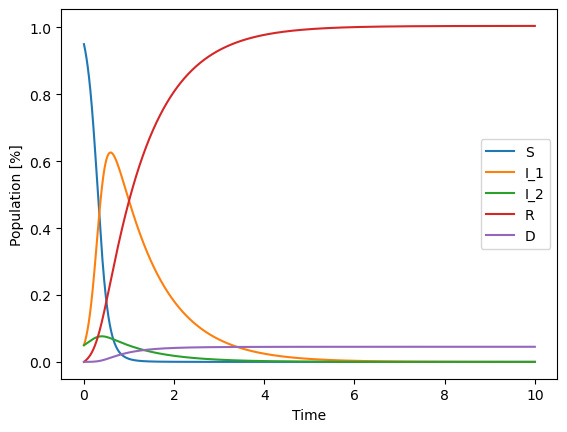

In [70]:
#SIRD diagram for 2 versions of the virus
import matplotlib.pyplot as plt
trange=[t*dt for t in range(nsteps+1)]
plt.figure()
plt.plot(trange,v_S,label='S')
plt.plot(trange,v_I_1,label='I_1')
plt.plot(trange,v_I_2,label='I_2')
plt.plot(trange,v_R,label='R')
plt.plot(trange,v_D,label='D')

plt.legend()

plt.xlabel('Time')
plt.ylabel('Population [%]')
plt.savefig('Diagrams/SIR_D_2version_10_1_0.01.png', bbox_inches='tight') #Ábra mentése

In [72]:
#SIRD modellből kinyert adatok generálása
#halottak száma (v_R)

print('Total number of deaths: ', v_D[nsteps])

#Összes fertőzőttek száma (v_I)
infected = (sum(v_I_1)*dt + sum(v_I_2)*dt) #changed
print('Total number of infections: ', infected)

#Maximális megbetegedések száma egyszerre
print('Maximum amount of infected people at the same time: ', max(v_I_1) + max(v_I_2)) #changed

#Milyen hosszú időszakban volt t < v_I_1(t) + v_I_2(t)
#'túlterhelt időszak'
q = 0.05
overloadedtime = 0.000
for i in v_I_1:
    if(i > q):
        overloadedtime += dt
for i in v_I_2:
    if(i > q):
        overloadedtime += dt
        
print('Length of time when v_I_1(t) + v_I_2 > t: ', overloadedtime)

Total number of deaths:  0.04529383382256745
Total number of infections:  1.0498757575098456
Maximum amount of infected people at the same time:  0.7027302888611371
Length of time when v_I_1(t) + v_I_2 > t:  4.26899999999976
